# Project AI

* MUHAMMAD AMMAR ZIQRY BIN ABDUL MUTALID (52213124733)
* MOHAMAD FIRDAUS BIN HUSSIN (52213124660)

# Instruction

Students must form a group of 3 students per group. 
Each group must assign 3 different roles among their groupmates: 
* Data Engineer 
* Data Scientist 
* Data Analyst 

For every roles, they are task to do different things: 

Data Engineer : Data preparation 
* Collecting data 
* Standardize data 
* Creating dataset 

Data Scientist : Data Modelling 
* Creating neural network model 
* Training the model 
* Perform hyperparameter tuning (transfer learning) 

Data Analyst : Data visualization 
* Visual the dataset to identify the class and labels 
* Understand the dataset to achieve the goals 
* Visualize the performance of the training model

# Question

Subspecies of Sunflowers
* Collect images of various sunflower subspecies, including 
Common Sunflower, Maximilian Sunflower, and Swamp 
Sunflower, highlighting their different flower sizes, colors, and 
growth habits. 

Found 7027 images belonging to 3 classes.
Found 3010 images belonging to 3 classes.
Found 10037 images belonging to 3 classes.
Training samples: 7027
Validation samples: 3010


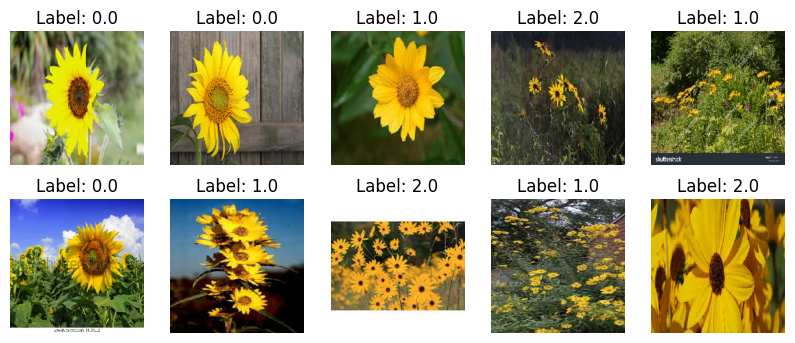

In [21]:
# Import required libraries
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define paths
base_dir = "sunflower"  # Base folder containing the sunflower subspecies folders

# Parameters
img_size = 224  # Resize all images to 224x224
batch_size = 32  # Batch size for data loading

# Create an ImageDataGenerator for training, validation, and testing
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    validation_split=0.3  # Use 30% of the data for validation/testing
)

# Create training data generator
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'  # Use this subset for training
)

# Create validation data generator
val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'  # Use this subset for validation
)

# Optionally, create a separate test generator if needed
test_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False  # Do not shuffle for evaluation
)

# Print details of the loaded data
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")

# Display some images
images, labels = next(train_generator)  # Fetch a batch of images and labels
fig, axes = plt.subplots(2, 5, figsize=(10, 4))  # 2 rows, 5 columns for displaying images
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])  # Show image
    ax.set_title(f"Label: {labels[i]}")  # Display label
    ax.axis('off')  # Hide axes
plt.show()


In [22]:
# Import required libraries
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False  # Freeze base model layers

# Add custom layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

# Learning rate schedule for hyperparameter tuning
initial_lr = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=10000,
    decay_rate=0.9
)

# Compile the model
model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)

# Train the model
start_time = time.time()
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping, checkpoint]
)
training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Save the trained model
model.save("sunflower_model.keras")


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 502s 2s/step - accuracy: 0.6719 - loss: 0.7606 - val_accuracy: 0.7548 - val_loss: 0.5693
Epoch 2/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 510s 2s/step - accuracy: 0.8392 - loss: 0.4073 - val_accuracy: 0.7598 - val_loss: 0.5294
Epoch 3/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 459s 2s/step - accuracy: 0.8724 - loss: 0.3316 - val_accuracy: 0.7548 - val_loss: 0.5877
Epoch 4/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step - accuracy: 0.8978 - loss: 0.2739 - val_accuracy: 0.7694 - val_loss: 0.5962
Epoch 5/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.9050 - loss: 0.2449 - val_accuracy: 0.7714 - val_loss: 0.6348
Epoch 6/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.9237 - loss: 0.2053 - val_accuracy: 0.7515 - val_loss: 0.7069
Epoch 7/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step - accuracy: 0.9383 - loss: 0.1704 - val_accuracy: 0.8033 - val_loss: 0.5956
Training time: 3194.56 seconds


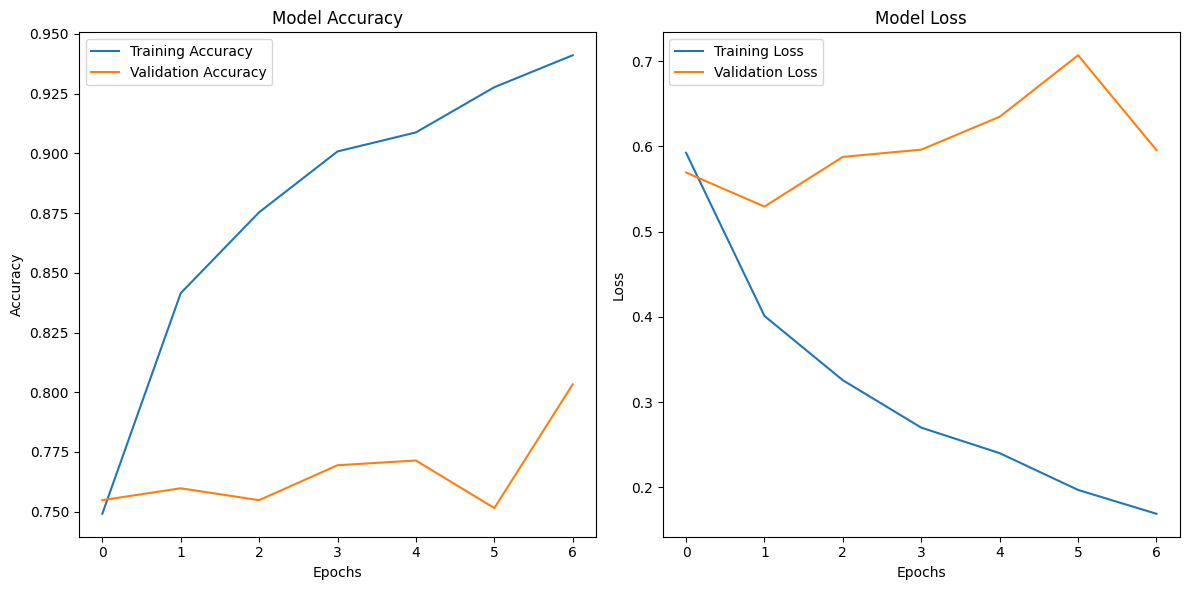

314/314 ━━━━━━━━━━━━━━━━━━━━ 473s 2s/step - accuracy: 0.8888 - loss: 0.2968
Test Accuracy: 85.79%
314/314 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step


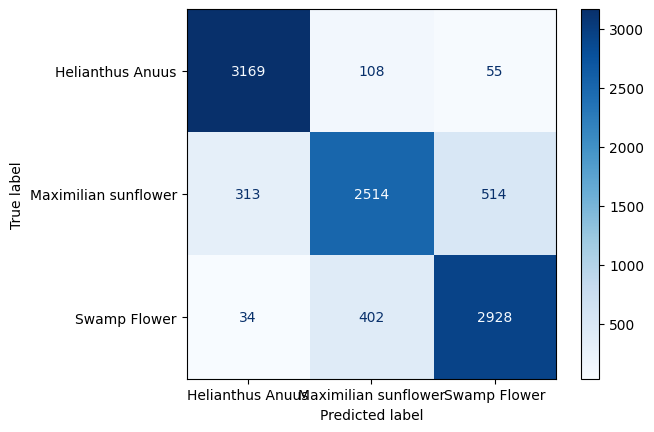

                      precision    recall  f1-score   support

    Helianthus Anuus       0.90      0.95      0.93      3332
Maximilian sunflower       0.83      0.75      0.79      3341
        Swamp Flower       0.84      0.87      0.85      3364

            accuracy                           0.86     10037
           macro avg       0.86      0.86      0.86     10037
        weighted avg       0.86      0.86      0.86     10037

314/314 ━━━━━━━━━━━━━━━━━━━━ 488s 2s/step
Mean Average Precision (mAP): 0.67


In [23]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve
import numpy as np
from sklearn.preprocessing import label_binarize

# Visualize Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on the test set using the test generator
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict on the test set
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes  # True labels from the generator
categories = list(test_generator.class_indices.keys())  # Class names from the generator

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=categories)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=categories))

# Precision-recall curve and mAP calculation for multi-class classification
y_true_bin = label_binarize(y_true, classes=np.arange(len(categories)))  # Binarize true labels for multi-class
y_probs = model.predict(test_generator)  # Predict probabilities for each class

# Compute precision-recall for each class
precision = {}
recall = {}
average_precision = {}
for i in range(len(categories)):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_probs[:, i])
    average_precision[i] = np.mean(precision[i])  # Mean precision for the current class

# Mean Average Precision (mAP)
mAP = np.mean(list(average_precision.values()))
print(f"Mean Average Precision (mAP): {mAP:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


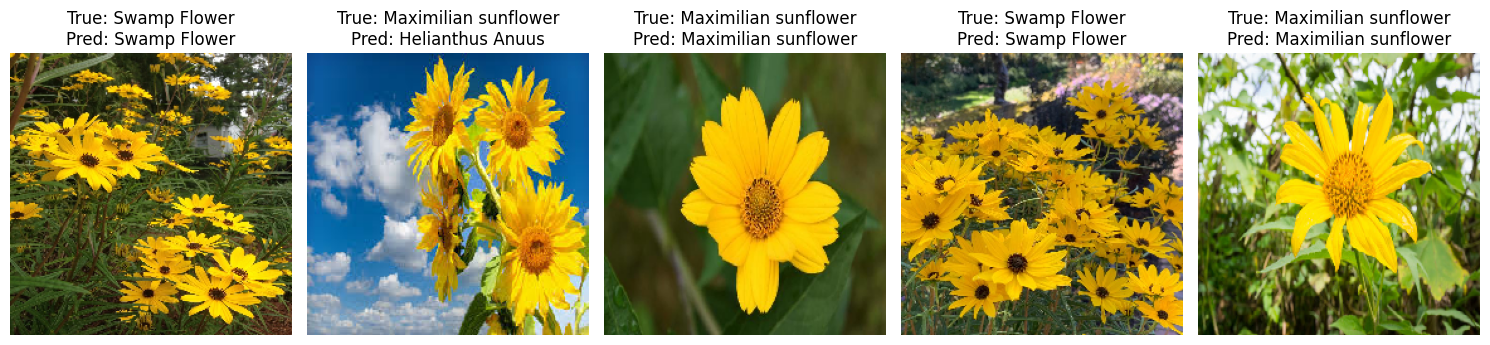

In [25]:
# Random sample visualization
import random

# Get a batch of validation data
val_images, val_labels = next(val_generator)

# Select a few random samples from the validation set
num_samples = 5  # Number of samples to display
random_indices = random.sample(range(len(val_images)), num_samples)

# Get the images and true labels for the selected indices
sample_images = val_images[random_indices]
true_labels = val_labels[random_indices]

# Predict the labels for these images
predicted_labels = np.argmax(model.predict(sample_images), axis=1)

# Display the images with their true and predicted labels
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i])
    true_label = categories[int(true_labels[i])]
    predicted_label = categories[int(predicted_labels[i])]
    ax.set_title(f"True: {true_label}\nPred: {predicted_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [26]:
# Conclusion
print("Conclusion:")
print(f"Model: MobileNetV2 (Transfer Learning)")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Training Time: {training_time:.2f} seconds")
print(f"mAP: {mAP:.2f}")

Conclusion:
Model: MobileNetV2 (Transfer Learning)
Test Accuracy: 85.79%
Training Time: 3194.56 seconds
mAP: 0.67
